In [66]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

In [67]:
PATH = "./car_details_v4.csv"
DATASET_SIZE = 10000

dataset = pd.read_csv(PATH)

dataset = dataset[["Year", "Price"]]
dataset = dataset[dataset["Year"] > 2005]
dataset["Price"] = dataset["Price"] / 1000000

dataset

,Year,Price
0,2017,0.505
1,2014,0.450
2,2011,0.220
3,2019,0.799
4,2018,1.950
...,...,...
2054,2016,0.850
2055,2014,0.275
2056,2013,0.240
2057,2018,4.290


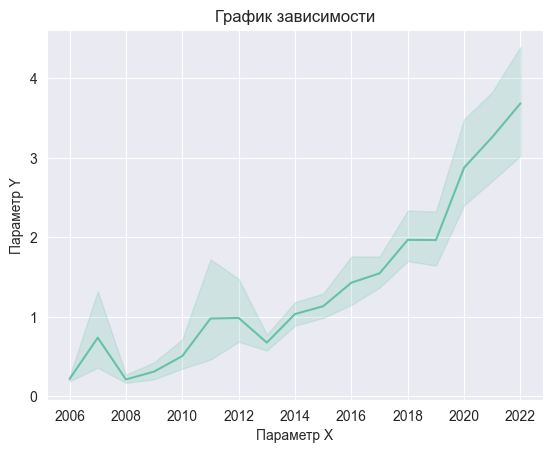

In [68]:
sns.set_style('darkgrid')
sns.set_palette('Set2')


sns.lineplot(
    x=dataset["Year"],
    y=dataset["Price"],
)

plt.title('График зависимости')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [69]:
x = np.array(dataset["Year"]).reshape(-1, 1)
y = np.array(dataset["Price"]).reshape(-1, 1)

x, y

(array([[2017],
        [2014],
        [2011],
        ...,
        [2013],
        [2018],
        [2017]]),
 array([[0.505],
        [0.45 ],
        [0.22 ],
        ...,
        [0.24 ],
        [4.29 ],
        [0.67 ]]))

In [70]:
DEGREES = 3

regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 5.184692238386528


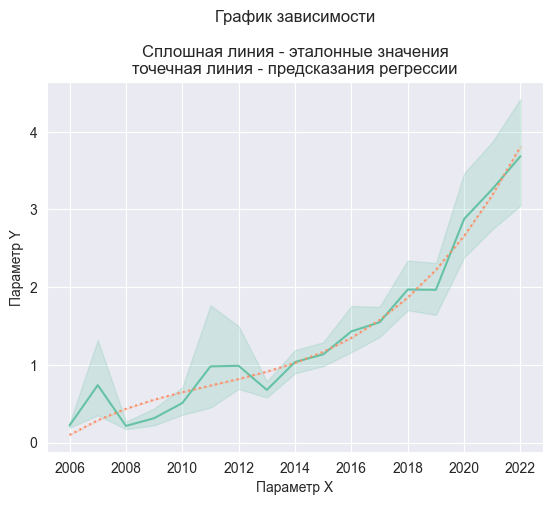

In [71]:
sns.lineplot(
    x=dataset["Year"],
    y=dataset["Price"],
    linestyle="solid"
)

sns.lineplot(
    x=dataset["Year"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)

plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [72]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

x_parameters

array([-1.35157568e+07,  2.01616675e+04, -1.00252000e+01,  1.66165242e-03])